# Sci-Kit Learn Housing Regression
Tony Nguyen

CPSC 222 01

12/7/2022

Data Assignment 7

I attempted the bonus

### Data Loading and Cleaning
This dataset contains infomration about houses sale prices and their attributes, which can be a factor affecting the price


In [28]:
import pandas as pd
df = pd.read_csv("house_data.csv", index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


If an attribute has at least 25% missing data, it will be removed. For row that has a missing value, it will also be removed.

So, after cleaning, I remove 5 attributes and 356 instances

In [29]:
for item in df.columns:
    if df[item].isna().sum() >= (len(df) * 25 / 100):
        df = df.drop(item, axis=1)

df.dropna(inplace=True)

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


### Exploratory Data Analysis
I choose eight attributes that I thought could be use to predict Sale Price
* `LotArea`: Lot size in square feet
* `Neighborhood`: Physical locations within Ames city limits
* `BldgType`: Type of dwelling
* `OverallQual`: Rates the overall material and finish of the house
* `OverallCond`: Rates the overall condition of the house
* `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions)
* `TotalBsmtSF`: Total square feet of basement area
* `GrLivArea`: Above grade (ground) living area square feet

Within those eight attributes, `Neighborhood` and `BldgType` are categorical attributes which will be converted to numeric using Sci-Kit Learn LabelEncoder

In [30]:
eda_df = df[["LotArea", "Neighborhood", "OverallQual", "OverallCond", "BldgType", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "SalePrice"]]
eda_df

,LotArea,Neighborhood,OverallQual,OverallCond,BldgType,YearRemodAdd,TotalBsmtSF,GrLivArea,SalePrice
Id,,,,,,,,,
1,8450,CollgCr,7,5,1Fam,2003,856,1710,208500
2,9600,Veenker,6,8,1Fam,1976,1262,1262,181500
3,11250,CollgCr,7,5,1Fam,2002,920,1786,223500
4,9550,Crawfor,7,5,1Fam,1970,756,1717,140000
5,14260,NoRidge,8,5,1Fam,2000,1145,2198,250000
...,...,...,...,...,...,...,...,...,...
1456,7917,Gilbert,6,5,1Fam,2000,953,1647,175000
1457,13175,NWAmes,6,6,1Fam,1988,1542,2073,210000
1458,9042,Crawfor,7,9,1Fam,2006,1152,2340,266500


After trimming the dataset to contain only the selected attributes, I use `LabelEncoder` to convert two categorical attributes above to numeric attributes

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for item in df.columns:
    if item == "Neighborhood" or item == "BldgType":
        le.fit(eda_df[item])
        eda_df[item] = le.transform(eda_df[item])

eda_df

/var/folders/mr/wygmm0bj0dsfg8_yx680046h0000gn/T/ipykernel_68248/360948952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df[item] = le.transform(eda_df[item])


,LotArea,Neighborhood,OverallQual,OverallCond,BldgType,YearRemodAdd,TotalBsmtSF,GrLivArea,SalePrice
Id,,,,,,,,,
1,8450,5,7,5,0,2003,856,1710,208500
2,9600,24,6,8,0,1976,1262,1262,181500
3,11250,5,7,5,0,2002,920,1786,223500
4,9550,6,7,5,0,1970,756,1717,140000
5,14260,15,8,5,0,2000,1145,2198,250000
...,...,...,...,...,...,...,...,...,...
1456,7917,8,6,5,0,2000,953,1647,175000
1457,13175,14,6,6,0,1988,1542,2073,210000
1458,9042,6,7,9,0,2006,1152,2340,266500


From the information above, I generate a heatmap of correlation matrix

In [32]:
corr_df = eda_df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

/var/folders/mr/wygmm0bj0dsfg8_yx680046h0000gn/T/ipykernel_68248/2021542359.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='bwr').set_precision(2)


,LotArea,Neighborhood,OverallQual,OverallCond,BldgType,YearRemodAdd,TotalBsmtSF,GrLivArea,SalePrice
LotArea,1.00,0.09,0.17,-0.03,-0.24,0.02,0.32,0.31,0.30
Neighborhood,0.09,1.00,0.21,-0.08,0.00,0.12,0.15,0.16,0.24
OverallQual,0.17,0.21,1.00,-0.19,0.07,0.57,0.55,0.61,0.80
OverallCond,-0.03,-0.08,-0.19,1.00,-0.17,0.02,-0.24,-0.12,-0.14
BldgType,-0.24,0.00,0.07,-0.17,1.00,0.11,-0.03,-0.12,-0.07
YearRemodAdd,0.02,0.12,0.57,0.02,0.11,1.00,0.30,0.29,0.52
TotalBsmtSF,0.32,0.15,0.55,-0.24,-0.03,0.30,1.00,0.49,0.62
GrLivArea,0.31,0.16,0.61,-0.12,-0.12,0.29,0.49,1.00,0.71
SalePrice,0.30,0.24,0.80,-0.14,-0.07,0.52,0.62,0.71,1.00


As we can see from the heatmap, `OverallQual`, `GrLivArea` and `TotalBsmtSF` has the strongest positive correlation to `SalePrice`. Meanwhile, `OverallCond` and `BldgType` has negative correlation. They also have the lowest correlation to SalePrice.

For the purpose of next tasks, I remove `OverallCond` and `BldgType` out of the dataset for more accurate prediction model.

In [33]:
eda_df.drop(["OverallCond", "BldgType"], axis=1, inplace=True)

/var/folders/mr/wygmm0bj0dsfg8_yx680046h0000gn/T/ipykernel_68248/1824530701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df.drop(["OverallCond", "BldgType"], axis=1, inplace=True)


### Build a Machine Learning model
1. Use `train_test_split()`
* Split the data to two groups using holdout method: train and test
* Reserve 25% of the data for testing

In [34]:
from sklearn.model_selection import train_test_split

y = eda_df["SalePrice"]
X = eda_df.drop("SalePrice", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

2. Plot the predicted value against the actual value

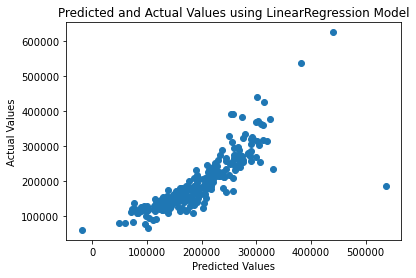

In [40]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lin_req = LinearRegression()
lin_req.fit(X_train, y_train)
y_pred = lin_req.predict(X_test)

plt.figure()
plt.scatter(y_pred, y_test)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted and Actual Values using LinearRegression Model")

plt.show()

3. Evaluate $R^2$
* From the initial eight attributes, $R^2$ score is 0.7104
* If I remove the `OverallCond` and `BldgType` attributes - the negative correlation ones, the new $R^2$ score is 0.7117
* The initial and new $R^2$ scores are not significantly difference, since they only vary by roughly 0.0013

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7116726327439866


5. Compare to `DecisionTreeRegressor`
* `DecisionTreeRegressor` $R^2$ score is 0.6907, which is less than $R^2$ score using LinearRegression method at 0.7117

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_req = DecisionTreeRegressor(random_state=0)
tree_req.fit(X_train, y_train)

y_pred = tree_req.predict(X_test)
r2 = tree_req.score(X_test, y_test)
print(r2)

0.6907247933041885
